# Payment Date Prediction 


### Importing related Libraries 

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### Store the dataset into the Dataframe


In [149]:

df = pd.read_csv ('/content/drive/MyDrive/HRC/dataset (1).csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [150]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [152]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [153]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [154]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [155]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing 

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [156]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [157]:
df[['baseline_create_date','document_create_date','document_create_date.1']].corr()


,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


#### Please check, Column 'posting_id' is constant columns or not


In [158]:
df['posting_id'].value_counts()
#it has 50000 rows and all the value of this column is 1.0

1.0    50000
Name: posting_id, dtype: int64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [159]:
df['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [160]:

df.drop(columns=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [161]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [162]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [163]:
df[df.duplicated()].shape[0]

1161

### Drop all the Duplicate Rows

In [164]:
df.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [165]:
df[df.duplicated()].shape[0]

0

### Check for the number of Rows and Columns in your dataset

In [166]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [167]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [168]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [169]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [170]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [171]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [172]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [173]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [174]:
df['converted_usd']=df['total_open_amount']
df.loc[df.invoice_currency=='CAD',['converted_usd']]=df['total_open_amount']*0.7

### Display the new "converted_usd" column values

In [175]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [176]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [177]:
df.drop(columns=['invoice_currency','total_open_amount'],inplace=True)

### Write a code to check the number of columns in dataframe

In [178]:
df.shape[1]

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [181]:
df.columns[df.isna().sum()>0]

Index(['clear_date'], dtype='object')

#### Find out the number of null values from the column that you got from the above code

In [182]:
df['clear_date'].isna().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [183]:
maindata=df.loc[df['clear_date'].isna()==False]
nulldata=df.loc[df['clear_date'].isna()==True]

### Check the number of Rows and Columns for both the dataframes 

In [184]:
maindata.shape

(39158, 11)

In [185]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [186]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [187]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [188]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']
maindata['Delay']

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [189]:
groupeddata=maindata.groupby(by=['name_customer'])['Delay'].mean(numeric_only=False)
groupeddata



name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [190]:
maindata.loc[:,'avg_delay']=maindata['name_customer'].map(groupeddata)
maindata


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-1 days +14:45:00
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1 days 13:36:42.985074626


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [191]:
maindata.loc[:,'avg_delay']=maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [192]:
maindata


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [193]:
maindata.drop(columns=['Delay','clear_date'],inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [194]:
maindata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'due_in_date', 'baseline_create_date',
       'cust_payment_terms', 'converted_usd', 'avg_delay'],
      dtype='object')

In [195]:
X = maindata[['business_code', 'cust_number', 'name_customer', 'buisness_year','doc_id', 'posting_date', 'due_in_date', 'baseline_create_date','cust_payment_terms', 'converted_usd']]
y = maindata[['avg_delay']]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [196]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [197]:
X_train.shape

(23494, 10)

In [198]:
X_loc_test.shape

(15664, 10)

In [199]:
y_train.shape

(23494, 1)

In [200]:
y_loc_test.shape

(15664, 1)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [201]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=101)

### Please check for the number of rows and columns of all the 4 dataframes 

In [202]:
y_val.shape

(7832, 1)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

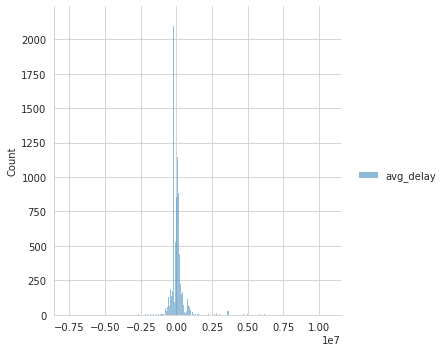

In [203]:
sns.set_style('whitegrid')
sns.displot(y_train,color= 'blue')

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [204]:
x_train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
x_train

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,99 CE,1
3,99 CE associates,1
4,99 CE co,1
...,...,...
3054,YEN BROS,1
3055,YEN BROS co,1
3056,YEN BROS corp,1
3057,YEN BROS corporation,2


### You can make another distribution plot of the "doc_id" column from x_train

(0.0, 100.0)

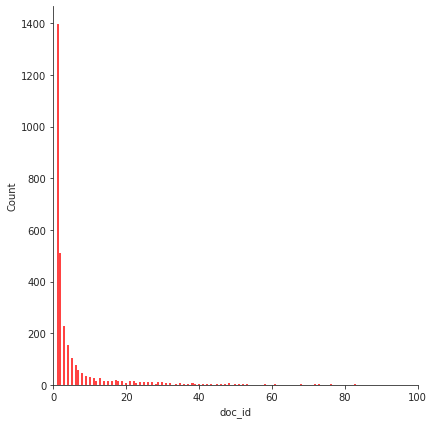

In [205]:
sns.set_style("ticks")
sns.displot(x_train,x="doc_id",color="red",aspect=1.0,height=6)
plt.xlim(0,100)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


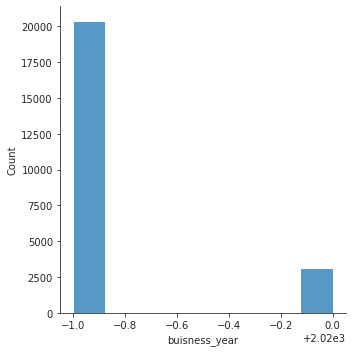

In [206]:
sns.displot(X_train['buisness_year'],bins=8)

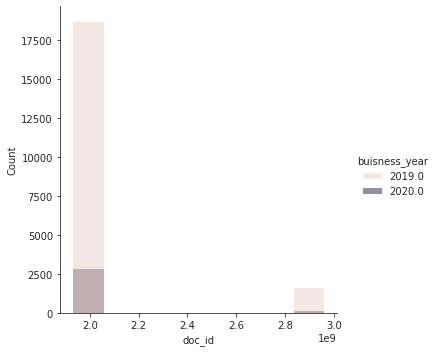

In [207]:
sns.displot(x=X_train["doc_id"], hue=X_train["buisness_year"],bins=8)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [208]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
33173,U001,0200769623,WAL-MAR trust,2019.0,1.929817e+09,2019-09-03,2019-09-18,2019-09-03,NAH4,68483.340
30787,CA02,0140104440,SO llc,2020.0,2.960615e+09,2020-02-22,2020-03-03,2020-02-22,CA10,86946.062
31285,U001,0200712105,WALG associates,2019.0,1.929603e+09,2019-07-09,2019-07-24,2019-07-09,NAA8,58345.440
8114,U001,0200418007,AM systems,2019.0,1.928657e+09,2019-01-24,2019-02-08,2019-01-24,NAA8,18667.200
28390,U001,0100031704,DELHAIZE corp,2019.0,1.930136e+09,2019-11-11,2019-11-26,2019-11-11,NAA8,15685.090
...,...,...,...,...,...,...,...,...,...,...
15472,U001,0200762301,C&S WH in,2020.0,1.930396e+09,2020-01-15,2020-01-30,2020-01-15,NAC6,26196.250
7023,U001,0200769623,WAL-MAR co,2019.0,1.928879e+09,2019-03-01,2019-03-16,2019-03-01,NAH4,42583.430
9972,U001,0200769623,WAL-MAR corporation,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAH4,10190.260
22264,U001,0200920735,ALBERT in,2019.0,1.929871e+09,2019-09-12,2019-09-27,2019-09-12,NAA8,68300.120


In [209]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132502,2.013481e+09,30722.347254
std,0.339043,2.802342e+08,36688.784819
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929175e+09,4574.575000
50%,2019.000000,1.929733e+09,16836.875000
75%,2019.000000,1.930210e+09,45267.505000
max,2020.000000,2.960617e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [210]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [211]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [212]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [213]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
33173,U001,1
30787,CA02,0
31285,U001,1
8114,U001,1
28390,U001,1
...,...,...
15472,U001,1
7023,U001,1
9972,U001,1
22264,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [214]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [215]:
X_train ,X_val, X_test = custom(['business_code'])

In [216]:
X_train

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
33173,0200769623,WAL-MAR trust,2019.0,1.929817e+09,2019-09-03,2019-09-18,2019-09-03,NAH4,68483.340,1
30787,0140104440,SO llc,2020.0,2.960615e+09,2020-02-22,2020-03-03,2020-02-22,CA10,86946.062,0
31285,0200712105,WALG associates,2019.0,1.929603e+09,2019-07-09,2019-07-24,2019-07-09,NAA8,58345.440,1
8114,0200418007,AM systems,2019.0,1.928657e+09,2019-01-24,2019-02-08,2019-01-24,NAA8,18667.200,1
28390,0100031704,DELHAIZE corp,2019.0,1.930136e+09,2019-11-11,2019-11-26,2019-11-11,NAA8,15685.090,1
...,...,...,...,...,...,...,...,...,...,...
15472,0200762301,C&S WH in,2020.0,1.930396e+09,2020-01-15,2020-01-30,2020-01-15,NAC6,26196.250,1
7023,0200769623,WAL-MAR co,2019.0,1.928879e+09,2019-03-01,2019-03-16,2019-03-01,NAH4,42583.430,1
9972,0200769623,WAL-MAR corporation,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAH4,10190.260,1
22264,0200920735,ALBERT in,2019.0,1.929871e+09,2019-09-12,2019-09-27,2019-09-12,NAA8,68300.120,1


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [217]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [218]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [219]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [220]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [221]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [222]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [223]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [224]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [225]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [226]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [227]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [228]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [229]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [230]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [231]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [232]:
X_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [233]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [234]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [235]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [236]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [237]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_createdate',
 'year_of_due',
 'year_of_createdate',
 'day_of_createdate',
 'month_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

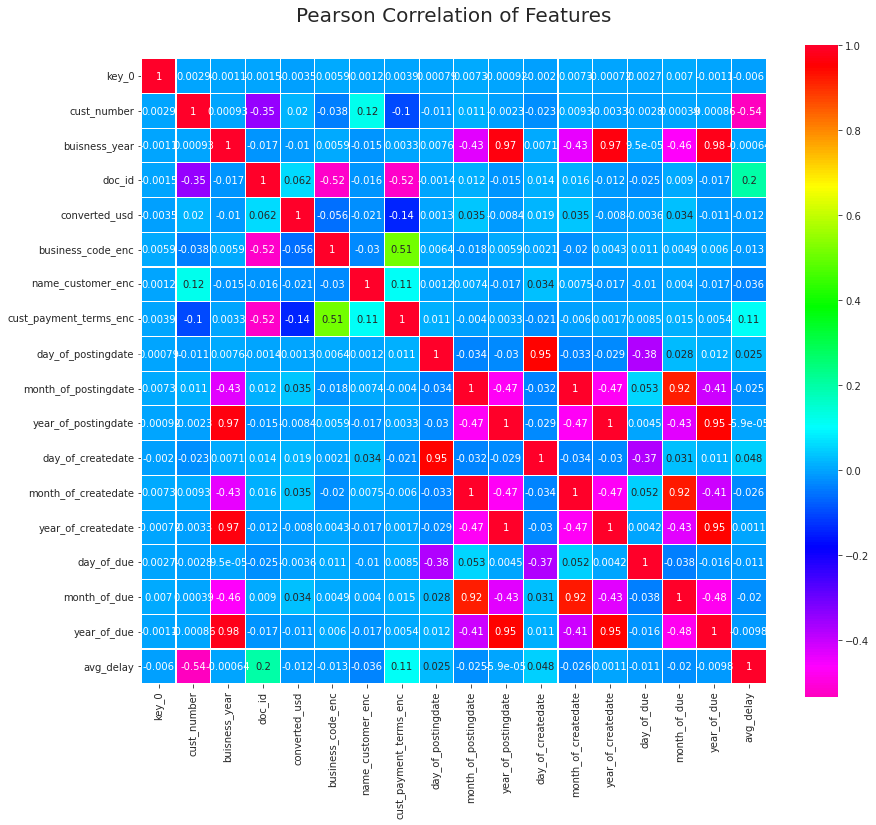

In [238]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [239]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [240]:
sel.variances_

array([1.79900159e+15, 1.14945158e-01, 7.85278832e+16, 1.34600964e+09,
       2.83469699e-01, 1.05751521e+06, 1.27551546e+02, 7.61224423e+01,
       1.22514142e+01, 1.15544046e-01, 7.76774131e+01, 1.22569105e+01,
       1.15650537e-01, 7.59113559e+01, 1.20596747e+01, 1.18279943e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [241]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [242]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [243]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [244]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

531043.5062602159

### Display The Comparison Lists

In [245]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[293082116368.57336],[0.3331960154283632],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [246]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [247]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [248]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

282007205541.1439

### Display The Comparison Lists

In [249]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LinearRegression'],[293082116368.57336, 293082116368.57336],[0.3331960154283632, 0.3331960154283632],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [250]:
from sklearn.tree import DecisionTreeRegressor 
Algorithm.append('DecisionTreeRegression')
regressor = DecisionTreeRegressor(random_state = 101)
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [251]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [252]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

221893144368.3897

### Display The Comparison Lists

In [253]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LinearRegression', 'DecisionTreeRegression'],[293082116368.57336, 293082116368.57336, 217822292097.5131],[0.3331960154283632, 0.3331960154283632, 0.5044229443310959],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [254]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
regressor = RandomForestRegressor(n_estimators = 101, random_state = 101)
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [255]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [256]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

110616548955.26851

### Display The Comparison Lists


In [257]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression'],[293082116368.57336, 293082116368.57336, 217822292097.5131, 125384463336.98448],[0.3331960154283632, 0.3331960154283632, 0.5044229443310959, 0.714732305087713],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [258]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[10:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [259]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [260]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

120999452388.82468

### Display The Comparison Lists


In [261]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGB Regressor'],[293082116368.57336, 293082116368.57336, 217822292097.5131, 125384463336.98448, 137798896408.49933],[0.3331960154283632, 0.3331960154283632, 0.5044229443310959, 0.714732305087713, 0.6864876836114788],

## You need to make the comparison list into a comparison dataframe 

In [262]:
temp_df=pd.DataFrame([Algorithm, MSE_Score, R2_Score])
comparison_table=temp_df.T
comparison_table.rename(columns={0: 'Model', 1: 'MSE', 2: 'R2'})

,Model,MSE,R2
0,LinearRegression,293082116368.573364,0.333196
1,LinearRegression,293082116368.573364,0.333196
2,DecisionTreeRegression,217822292097.513092,0.504423
3,RandomForestRegression,125384463336.984482,0.714732
4,XGB Regressor,137798896408.499329,0.686488


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [264]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[10:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [265]:
mean_squared_error(y_test,predictedfinal,squared=False)

371212.7374006707

### Calculate the mean Square Error for validation dataset

In [266]:
mean_squared_error(y_val, predict_testfinal)

120999452388.82468

### Calculate the R2 score for test

In [267]:
r2_score(y_test, predictedfinal)

0.6864876836114788

### Calculate the R2 score for Validation

In [268]:
r2_score(y_val, predict_testfinal)

0.7172223113159837

### Calculate the Accuracy for train Dataset 

In [270]:
regressorfinal.score(X_train,y_train)

0.7579101289673447

### Calculate the accuracy for validation

In [271]:
regressorfinal.score(X_val,y_val)

0.7172223113159837

### Calculate the accuracy for test

In [272]:
regressorfinal.score(X_test,y_test)

0.6864876836114788

## Specify the reason behind choosing your machine learning model 

- Note : 

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [273]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [274]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [275]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [276]:
backupdataset=nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [277]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [278]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [279]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [280]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [281]:
nulldata.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [282]:
nulldata.drop(columns=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],inplace=True)
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

### Check the information of the "nulldata" dataframe

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

### Now you can pass this dataset into you final model and store it into "final_result"

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

### Check for the Number of Rows and Columns in your "Final" dataframe 

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins= ___________________
labels =__________________________
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

### Display the count of each categoty of new "Aging Bucket" column 

### Display your final dataset with aging buckets 

### Store this dataframe into the .csv format

# END OF THE PROJECT